<font size=4>
Registration number: 210616

Import Necessary Libraries

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size=5>
Metrics

Define the metrics that will be used in this data-set (ATT)

In [ ]:
def abs_att(effect_true, effect_pred):
  ATT=np.abs(np.mean(effect_true)-np.mean(effect_pred))
  return ATT

<font size=5>
Read data set

In [21]:
df = pd.read_csv("jobs.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


Check how balanced the data is

In [6]:
df.value_counts('t')

t  
0.0    2915
1.0     297
dtype: int64

Confirm the number of samples

In [20]:
df.index

RangeIndex(start=0, stop=3212, step=1)

Check if there is any missing data 
(There isn't)

In [3]:
df.isnull().sum(axis = 0)

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
t      0
y      0
e      0
dtype: int64

Quick analysis with the median and mean of the outcomes

In [4]:
df.groupby('t')['y'].agg(['median','mean'])

,median,mean
t,,
0.0,1.0,0.857633
1.0,1.0,0.774411


Histogram of both treated and untreated outcomes

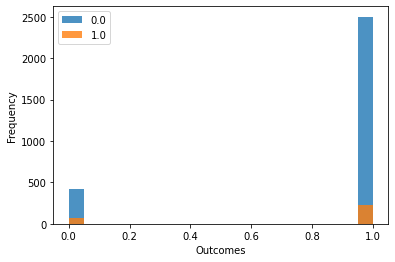

In [30]:
df.groupby('t')['y'].plot(kind='hist', bins=20, alpha=0.8, legend=True)
plt.xlabel('Outcomes')
plt.savefig('JOBS_Outcome.png', dpi=1200)

Divide the background variables, treatment, outcome and experiment data

In [25]:
X=df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17']]
T=df['t']
Y=df['y']
e=df['e']

Quick visualisation of the data

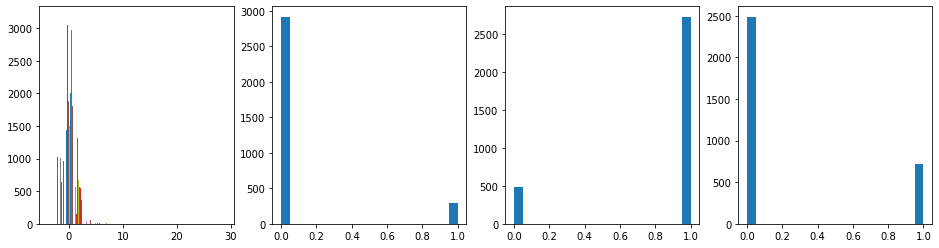

In [26]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
axs[3].hist(e, bins=bins)
plt.show()

<font size=5>
Preprocessing

Split the data and scale it

In [31]:
x_train, x_test, t_train, t_test, y_train, y_test, e_train, e_test = train_test_split(X, T, Y, e, test_size=0.2)

t_train = t_train.to_numpy()
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

Concatenate the x and t training data to prepare it for the Random Forest Regressor

In [32]:
xt_train = np.concatenate([x_train,t_train.reshape(-1,1)], axis=1)
